#   Загрузить данные Market_Basket_Optimisation.csv

In [272]:
import matplotlib.pyplot as plt
import pandas as pd

In [273]:
data = pd.read_csv('../Datasets_for_work/Data_8/Market_Basket_Optimisation.csv')
data

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#   Визуализировать данные (отразить на гистограммах относительную и фактическую частоту 
#   встречаемости для 20 наиболее популярных товаров).

#   относительная частота

<Axes: >

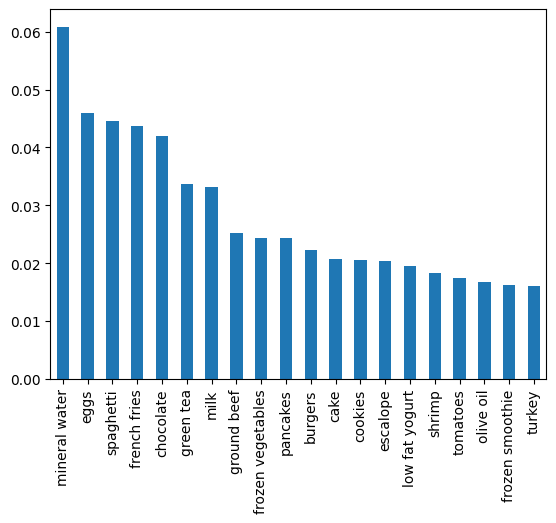

In [274]:
data.stack().value_counts(normalize=True)[:20].plot(kind='bar')

#   фактическая частота

mineral water    0.238267
eggs             0.179733
spaghetti        0.174133
french fries     0.170933
chocolate        0.164000
                   ...   
bramble          0.001867
cream            0.000933
napkins          0.000667
water spray      0.000400
 asparagus       0.000133
Name: count, Length: 120, dtype: float64


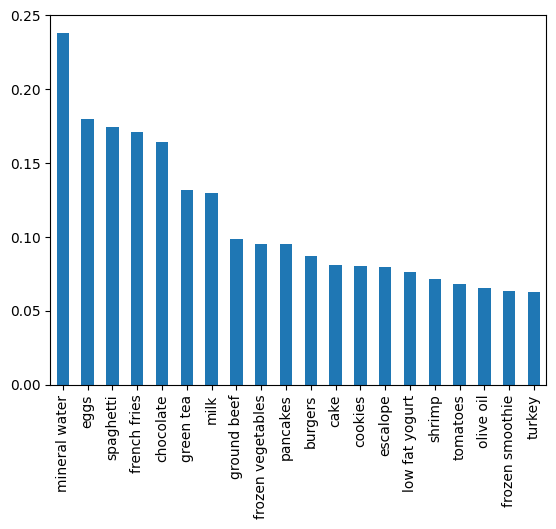

In [275]:
data.stack().value_counts().apply(lambda item: item / data.shape[0])[:20].plot(kind='bar')
print(data.stack().value_counts().apply(lambda item: item / data.shape[0]))

#   Применить алгоритм Apriori, используя 3 разные библиотеки
#   (apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для
#   алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

In [276]:
transactions = []
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

In [277]:
transactions[0][0]

'burgers'

In [278]:
transactions[0]

['burgers', 'meatballs', 'eggs']

In [279]:
len(transactions)

7500

In [280]:
from apriori_python import apriori
import time

In [281]:
t = []
start = time.perf_counter()
t1, rules = apriori(transactions, minSup=0.04, minConf=0.04)
time1 = (time.perf_counter() - start)
t.append(time1)

In [282]:
print(len(rules))
rules

10


[[{'mineral water'}, {'ground beef'}, 0.17179630665920537],
 [{'mineral water'}, {'milk'}, 0.20145495243424735],
 [{'mineral water'}, {'eggs'}, 0.21376608841634023],
 [{'mineral water'}, {'chocolate'}, 0.22104085058757694],
 [{'mineral water'}, {'spaghetti'}, 0.2506994963626189],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

In [283]:
from apyori import apriori

In [284]:
start = time.perf_counter()
rules = apriori(transactions=transactions,
                min_support=0.04,
                min_confidence=0.04,
                min_lift=1.0001)
results = list(rules)
time2 = (time.perf_counter() - start)
t.append(time2)

In [285]:
print(len(results))
for results in results:
    for subset in results[2]:
        print(subset[0], subset[1])
        print(f'Support: {results[1]}, Confidence: {subset[2]}, Lift: {subset[3]}')
        print()

5
frozenset({'chocolate'}) frozenset({'mineral water'})
Support: 0.05266666666666667, Confidence: 0.32139951179820997, Lift: 1.3489067367020564

frozenset({'mineral water'}) frozenset({'chocolate'})
Support: 0.05266666666666667, Confidence: 0.22104085058757697, Lift: 1.3489067367020564

frozenset({'eggs'}) frozenset({'mineral water'})
Support: 0.05093333333333333, Confidence: 0.28338278931750743, Lift: 1.1893513821383916

frozenset({'mineral water'}) frozenset({'eggs'})
Support: 0.05093333333333333, Confidence: 0.21376608841634023, Lift: 1.1893513821383916

frozenset({'ground beef'}) frozenset({'mineral water'})
Support: 0.040933333333333335, Confidence: 0.41655359565807326, Lift: 1.7482663499919135

frozenset({'mineral water'}) frozenset({'ground beef'})
Support: 0.040933333333333335, Confidence: 0.1717963066592054, Lift: 1.7482663499919138

frozenset({'milk'}) frozenset({'mineral water'})
Support: 0.048, Confidence: 0.3703703703703704, Lift: 1.5544363613753656

frozenset({'mineral wa

In [286]:
results

RelationRecord(items=frozenset({'mineral water', 'spaghetti'}), support=0.05973333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mineral water'}), items_add=frozenset({'spaghetti'}), confidence=0.2506994963626189, lift=1.4396984860027884), OrderedStatistic(items_base=frozenset({'spaghetti'}), items_add=frozenset({'mineral water'}), confidence=0.3430321592649311, lift=1.4396984860027886)])

In [287]:
from efficient_apriori import apriori

In [288]:
start = time.perf_counter()
itemsets, rules = apriori(transactions, min_support=0.04, min_confidence=0.04)
time3 = (time.perf_counter() - start)
t.append(time3)

In [289]:
print(len(rules))
for i in rules:
    print(i)

10
{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.349, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{mineral water} -> {ground beef} (conf: 0.172, supp: 0.041, lift: 1.748, conv: 1.089)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)


#   Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать гиперпараметры для алгоритма так, чтобы выводилось порядка 10 наилучших правил.

In [290]:
from fpgrowth_py import fpgrowth

In [291]:
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.04, minConf=0.04)
time4 = (time.perf_counter() - start)
t.append(time4)

In [292]:
print(len(rules))
for i in rules:
    print(i)

10
[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'mineral water'}, {'ground beef'}, 0.17179630665920537]
[{'mineral water'}, {'milk'}, 0.20145495243424735]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'mineral water'}, {'chocolate'}, 0.22104085058757694]
[{'mineral water'}, {'spaghetti'}, 0.2506994963626189]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]
[{'mineral water'}, {'eggs'}, 0.21376608841634023]


#	Сравнить время выполнения всех алгоритмов и построить гистограмму.

Время apriori: 0.9821822000085376
Время apriori 2: 0.014187200053129345
Время efficient_apriori: 0.011448300036136061
Время fpgrowth_py: 0.1854520000051707


<BarContainer object of 4 artists>

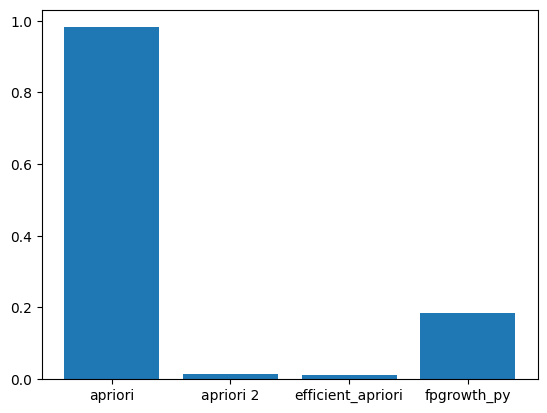

In [293]:
print(f'Время apriori: {t[0]}')
print(f'Время apriori 2: {t[1]}')
print(f'Время efficient_apriori: {t[2]}')
print(f'Время fpgrowth_py: {t[3]}')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth_py'], t)

In [294]:
new_data = pd.read_csv('../Datasets_for_work/Data_8/data.csv')
new_data

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9525,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9526,Truffles,Tea,Spanish Brunch,Christmas common,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9527,Muffin,Tacos/Fajita,Coffee,Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9528,Coffee,Pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#   Визуализировать данные (отразить на гистограммах относительную и фактическую частоту 
#   встречаемости для 20 наиболее популярных товаров).

#   относительная частота

<Axes: >

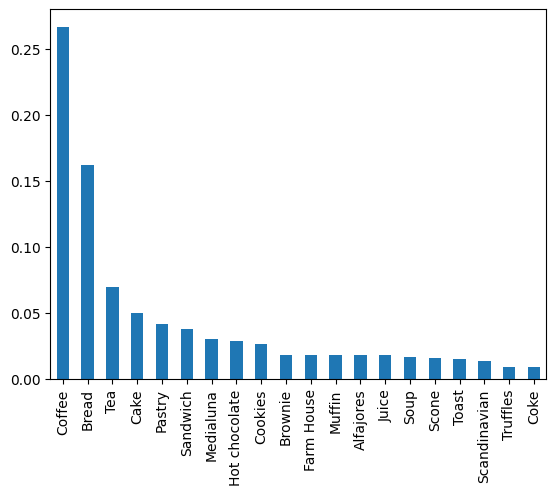

In [295]:
new_data.stack().value_counts(normalize=True)[:20].plot(kind='bar')

#   фактическая частота

Coffee              0.574082
Bread               0.348793
Tea                 0.150577
Cake                0.107555
Pastry              0.089822
                      ...   
Olum & polenta      0.000105
Gift voucher        0.000105
Coffee granules     0.000105
Raw bars            0.000105
Chicken sand        0.000105
Name: count, Length: 102, dtype: float64


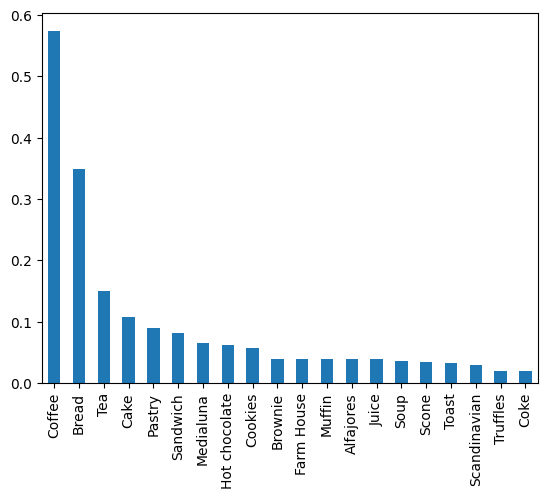

In [296]:
new_data.stack().value_counts().apply(lambda item: item / new_data.shape[0])[:20].plot(kind='bar')
print(new_data.stack().value_counts().apply(lambda item: item / new_data.shape[0]))

#   Применить алгоритм Apriori, используя 3 разные библиотеки
#   (apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для
#   алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

In [297]:
transactions = []
for i in range(new_data.shape[0]):
    row = new_data.iloc[i].dropna().tolist()
    transactions.append(row)

In [298]:
transactions[0][0]

'Scandinavian'

In [299]:
transactions[0]

['Scandinavian', 'Scandinavian']

In [300]:
len(transactions)

9530

In [301]:
from apriori_python import apriori
import time

In [302]:
t = []
start = time.perf_counter()
t1, rules = apriori(transactions, minSup=0.035, minConf=0.035)
time1 = (time.perf_counter() - start)
t.append(time1)

In [303]:
print(len(rules))
rules

10


[[{'Coffee'}, {'Sandwich'}, 0.0799469964664311],
 [{'Coffee'}, {'Pastry'}, 0.09938162544169611],
 [{'Coffee'}, {'Tea'}, 0.10424028268551237],
 [{'Coffee'}, {'Cake'}, 0.11439929328621908],
 [{'Coffee'}, {'Bread'}, 0.1881625441696113],
 [{'Bread'}, {'Coffee'}, 0.2751937984496124],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037]]

In [304]:
from apyori import apriori

In [305]:
start = time.perf_counter()
rules = apriori(transactions=transactions,
                min_support=0.035,
                min_confidence=0.035,
                min_lift=1.0001)
results = list(rules)
time2 = (time.perf_counter() - start)
t.append(time2)

In [306]:
print(len(results))
for results in results:
    for subset in results[2]:
        print(subset[0], subset[1])
        print(f'Support: {results[1]}, Confidence: {subset[2]}, Lift: {subset[3]}')
        print()

3
frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.05435466946484785, Confidence: 0.5269582909460834, Lift: 1.109079618532724

frozenset({'Coffee'}) frozenset({'Cake'})
Support: 0.05435466946484785, Confidence: 0.11439929328621908, Lift: 1.109079618532724

frozenset({'Coffee'}) frozenset({'Pastry'})
Support: 0.0472193074501574, Confidence: 0.09938162544169611, Lift: 1.162094344121919

frozenset({'Pastry'}) frozenset({'Coffee'})
Support: 0.0472193074501574, Confidence: 0.5521472392638037, Lift: 1.162094344121919

frozenset({'Coffee'}) frozenset({'Sandwich'})
Support: 0.037985309548793283, Confidence: 0.0799469964664311, Lift: 1.1204336416545417

frozenset({'Sandwich'}) frozenset({'Coffee'})
Support: 0.037985309548793283, Confidence: 0.5323529411764706, Lift: 1.1204336416545417


In [307]:
results

RelationRecord(items=frozenset({'Coffee', 'Sandwich'}), support=0.037985309548793283, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Coffee'}), items_add=frozenset({'Sandwich'}), confidence=0.0799469964664311, lift=1.1204336416545417), OrderedStatistic(items_base=frozenset({'Sandwich'}), items_add=frozenset({'Coffee'}), confidence=0.5323529411764706, lift=1.1204336416545417)])

In [308]:
from efficient_apriori import apriori

In [309]:
start = time.perf_counter()
itemsets, rules = apriori(transactions, min_support=0.035, min_confidence=0.035)
time3 = (time.perf_counter() - start)
t.append(time3)

In [310]:
print(len(rules))
for i in rules:
    print(i)

10
{Coffee} -> {Bread} (conf: 0.188, supp: 0.089, lift: 0.579, conv: 0.832)
{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Coffee} -> {Cake} (conf: 0.114, supp: 0.054, lift: 1.109, conv: 1.013)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Coffee} -> {Pastry} (conf: 0.099, supp: 0.047, lift: 1.162, conv: 1.015)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)
{Coffee} -> {Sandwich} (conf: 0.080, supp: 0.038, lift: 1.120, conv: 1.009)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)
{Coffee} -> {Tea} (conf: 0.104, supp: 0.050, lift: 0.736, conv: 0.958)


#   Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать гиперпараметры для алгоритма так, чтобы выводилось порядка 10 наилучших правил.

In [311]:
from fpgrowth_py import fpgrowth

In [312]:
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.035, minConf=0.035)
time4 = (time.perf_counter() - start)
t.append(time4)

In [313]:
print(len(rules))
for i in rules:
    print(i)

16
[{'Coffee'}, {'Cookies'}, 0.05896643109540636]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Coffee'}, {'Hot chocolate'}, 0.061837455830388695]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Coffee'}, {'Medialuna'}, 0.07354240282685512]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Coffee'}, {'Sandwich'}, 0.0799469964664311]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Coffee'}, {'Pastry'}, 0.09938162544169611]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Coffee'}, {'Cake'}, 0.11439929328621908]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Coffee'}, {'Tea'}, 0.10424028268551237]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Coffee'}, {'Bread'}, 0.1881625441696113]
[{'Bread'}, {'Coffee'}, 0.2751937984496124]


#	Сравнить время выполнения всех алгоритмов и построить гистограмму.

Время apriori: 0.2947767999721691
Время apriori 2: 0.006683100014925003
Время efficient_apriori: 0.006769100029487163
Время fpgrowth_py: 0.20213130000047386


<BarContainer object of 4 artists>

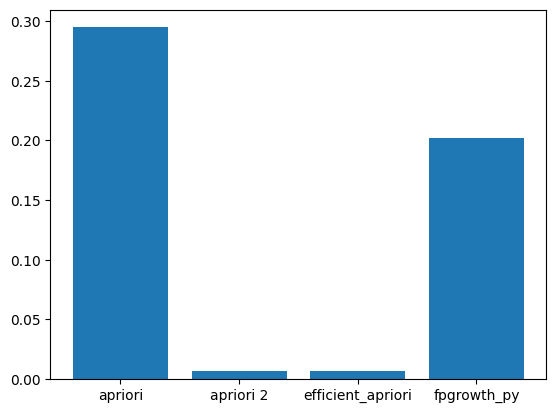

In [314]:
print(f'Время apriori: {t[0]}')
print(f'Время apriori 2: {t[1]}')
print(f'Время efficient_apriori: {t[2]}')
print(f'Время fpgrowth_py: {t[3]}')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth_py'], t)